# Support Vector Machines with Python

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [5]:

IRIS = pd.read_csv('../Resource/IRIS.csv')

In [6]:
IRIS.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [19]:
IRIS.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
print(IRIS['petal_width'])

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64


In [7]:
print(IRIS['species'])

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


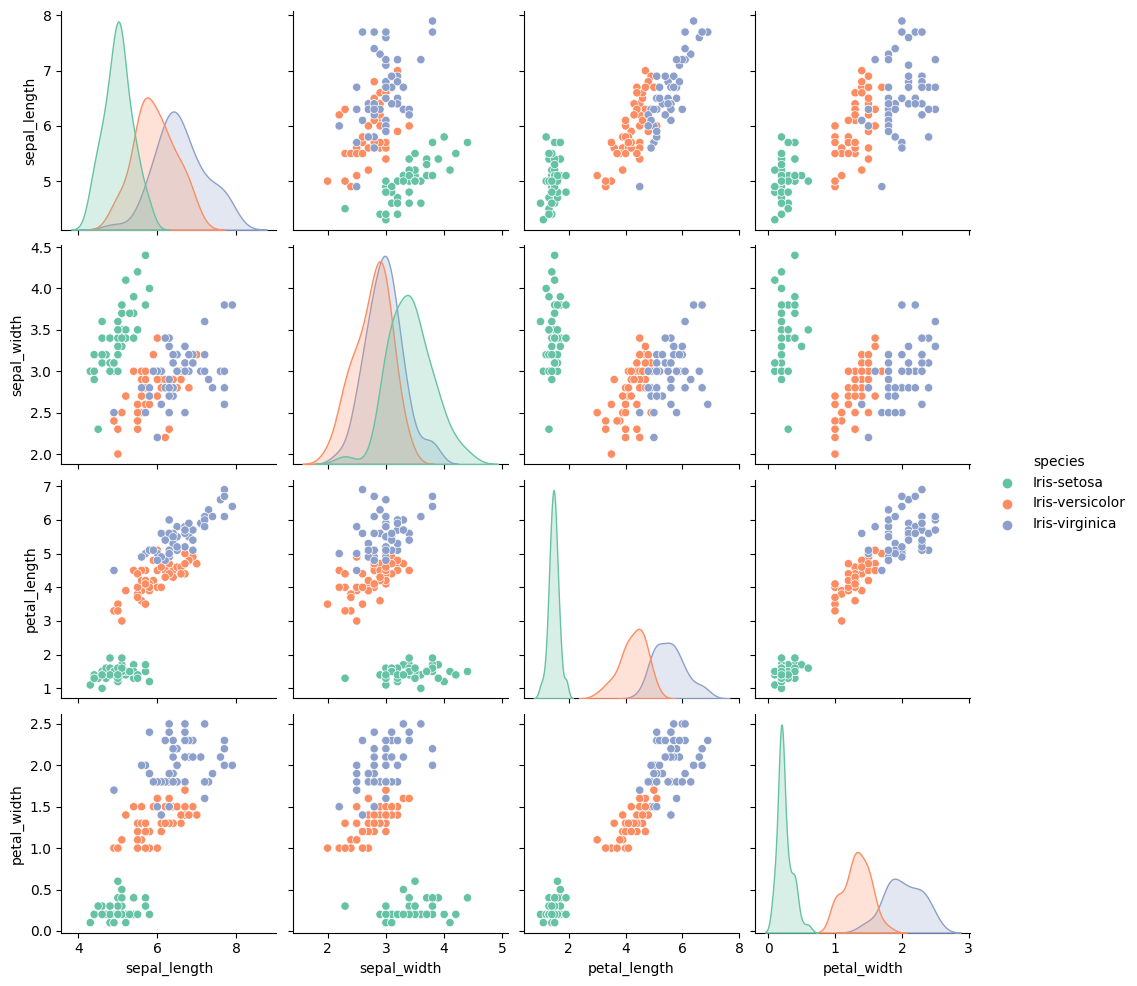

In [20]:
sns.pairplot(data=IRIS, hue='species', palette='Set2')

## Set up DataFrame

In [9]:
df_IRIS = pd.DataFrame(IRIS['sepal_length'],columns=IRIS['species'])
df_IRIS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 150 entries, Iris-setosa to Iris-virginica
dtypes: object(150)
memory usage: 0.0+ bytes


In [11]:
IRIS['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [12]:
df_petal_width = pd.DataFrame(IRIS['petal_width'],columns=['IRIS'])

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [21]:
x=IRIS.iloc[:,:-1]
y=IRIS.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [22]:
from sklearn.svm import SVC
model=SVC()

In [23]:
model.fit(x_train, y_train)

SVC()

In [24]:
pred=model.predict(x_test)

## Model Evaluation

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(confusion_matrix(y_test,pred))

[[15  0  0]
 [ 0 13  0]
 [ 0  2 15]]


In [27]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



## Gridsearch

In [28]:
param_grid = {'C': [0.1,1,5, 10, 50, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear']}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

In [32]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.429 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.381 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.333 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.333 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.333 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.952 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.952 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.952 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.952 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.905 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 50, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=5)

In [33]:
grid.best_params_

{'C': 1, 'gamma': 10, 'kernel': 'linear'}

In [34]:
grid.best_estimator_

SVC(C=1, gamma=10, kernel='linear')

In [35]:
grid_predictions = grid.predict(x_test)

In [36]:
print(confusion_matrix(y_test,grid_predictions))

[[15  0  0]
 [ 0 13  0]
 [ 0  0 17]]


In [37]:
print(classification_report(y_test,grid_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

